In [1]:
import pandas as pd
from pandas import isnull
import numpy as np 
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv(os.path.join("googleplaystoremaster.csv"))

In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Checking for missing values in Price and Installs

In [4]:
(data["Price"]
        .pipe(isnull)
        .value_counts())

False    10841
Name: Price, dtype: int64

In [5]:
(data["Installs"]
        .pipe(isnull)
        .value_counts())

False    10841
Name: Installs, dtype: int64

In [6]:
# Creating a dataframe with the needed variables
df = data.drop(columns=['App', 'Reviews', 'Size',
                        'Type', 'Rating', 'Content Rating',
                        'Genres', 'Last Updated',
                        'Current Ver', 'Android Ver'])

In [7]:
df.head()

,Category,Installs,Price
0,ART_AND_DESIGN,"10,000+",0
1,ART_AND_DESIGN,"500,000+",0
2,ART_AND_DESIGN,"5,000,000+",0
3,ART_AND_DESIGN,"50,000,000+",0
4,ART_AND_DESIGN,"100,000+",0


## Further inspect and clean the data

In [8]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [9]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [10]:
# Cleaning the Installs column
df = df[df.Installs != 'Free']

In [11]:
# Removing commas from Installs
df['Installs'].replace(',','', regex=True, inplace=True)

In [12]:
# Removing addition symbols from Installs
df['Installs'] = df['Installs'].str.replace('\+','')

In [13]:
df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [14]:
# Converting the Installs column to int
df['Installs'] = df['Installs'].astype(str).astype(float)

In [15]:
print(df.dtypes)

Category     object
Installs    float64
Price        object
dtype: object


In [16]:
# Cleaning the Price Column
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [17]:
# Removing rows which contain 'Everyone'
df = df[df.Price != 'Everyone']

In [18]:
# Removing $ symbols from Price
df['Price'] = df['Price'].str.replace('\$','')

In [19]:
df['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [20]:
df['Price'] = df['Price'].astype(float)

In [21]:
print(df.dtypes)

Category     object
Installs    float64
Price       float64
dtype: object


In [22]:
# Look at the dataframe again
df.head()

,Category,Installs,Price
0,ART_AND_DESIGN,10000.0,0.0
1,ART_AND_DESIGN,500000.0,0.0
2,ART_AND_DESIGN,5000000.0,0.0
3,ART_AND_DESIGN,50000000.0,0.0
4,ART_AND_DESIGN,100000.0,0.0


In [23]:
# Time to drop all Categories but Finance
df.drop(df[df['Category'] != 'FINANCE'].index, inplace=True)

In [24]:
df.head()

,Category,Installs,Price
1048,FINANCE,10000000.0,0.0
1049,FINANCE,1000000.0,0.0
1050,FINANCE,5000000.0,0.0
1051,FINANCE,5000000.0,0.0
1052,FINANCE,5000000.0,0.0


In [25]:
df['Price'].value_counts()

0.00      349
399.99      6
3.99        2
2.99        2
30.99       1
394.99      1
5.99        1
18.99       1
1.99        1
28.99       1
4.99        1
Name: Price, dtype: int64

In [55]:
# Set variable a to Installs, and variable b to Price
a = df['Installs']
b = df['Price']

## Analysis

### Pearson Coefficient

In [27]:
from scipy import stats

In [28]:
stats.pearsonr(a, b)

(-0.03105454097375926, 0.5537039813584019)

### Simple Linear Regression

In [29]:
slope, intercept, r_value, p_value, std_err = stats.linregress(a,b)

In [30]:
print ("r-squared:", r_value**2)

r-squared: 0.0009643845150909129


## Visualizations

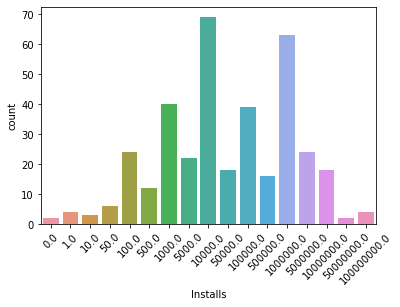

In [36]:
g=sns.countplot(x="Installs", data=df)
plt.xticks(rotation=45)
plt.show()

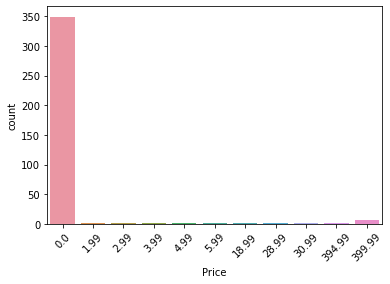

In [32]:
g=sns.countplot(x="Price", data=df)
plt.xticks(rotation=45)
plt.show()

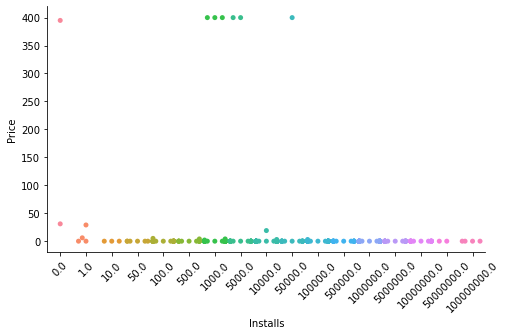

In [33]:
g=sns.catplot(x="Installs", y="Price", kind="swarm", data=df)
g.fig.set_size_inches(8,4)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Testing if dropping apps >= 50 changes the results

In [52]:
x = df[df.Price <= 50]

In [54]:
v = x['Price']
f = x['Installs']

In [56]:
stats.pearsonr(v, f)

(-0.02558333394835666, 0.6290080049402957)

In [ ]:
# The results did not change drastically, 
# so I will leave the outliers in.